In [1]:
%matplotlib inline

import lmfit
import numpy as np
from bluesky import RunEngine
from bluesky.plans import scan, rel_scan, list_scan, rel_list_scan, log_scan
from bluesky.plan_stubs import mv
from bluesky.callbacks import LiveFitPlot, LiveFit, LivePlot
from bluesky.callbacks.fitting import PeakStats
from bluesky.callbacks.mpl_plotting import plot_peak_stats
from ophyd.sim import det, motor, noisy_det
import matplotlib.pyplot as plt

plt.ion()

from jupyter_plot import JupyterLivePlot, JupyterLiveFitPlot

In [2]:
RE = RunEngine()
motor.delay = 0.2

## Scan

In [3]:
help(scan)

Help on function scan in module bluesky.plans:

scan(detectors: Sequence[bluesky.protocols.Readable], *args: Union[bluesky.protocols.Movable, Any], num: Optional[int] = None, per_step: Union[Callable[[Sequence[bluesky.protocols.Readable], bluesky.protocols.Movable, Any, Optional[Callable[[Sequence[bluesky.protocols.Readable]], Generator[bluesky.utils.Msg, Any, Mapping[str, bluesky.protocols.Reading]]]]], Generator[bluesky.utils.Msg, Any, ~P]], Callable[[Sequence[bluesky.protocols.Readable], Mapping[bluesky.protocols.Movable, Any], Dict[bluesky.protocols.Movable, Any], Optional[Callable[[Sequence[bluesky.protocols.Readable]], Generator[bluesky.utils.Msg, Any, Mapping[str, bluesky.protocols.Reading]]]]], Generator[bluesky.utils.Msg, Any, ~P]], NoneType] = None, md: Optional[Dict[str, Any]] = None) -> Generator[bluesky.utils.Msg, Any, str]
    Scan over one multi-motor trajectory.

    Parameters
    ----------
    detectors : list or tuple
        list of 'readable' objects
    *args :
 

('c310936f-cad6-46fb-a96d-efef6e277526',)

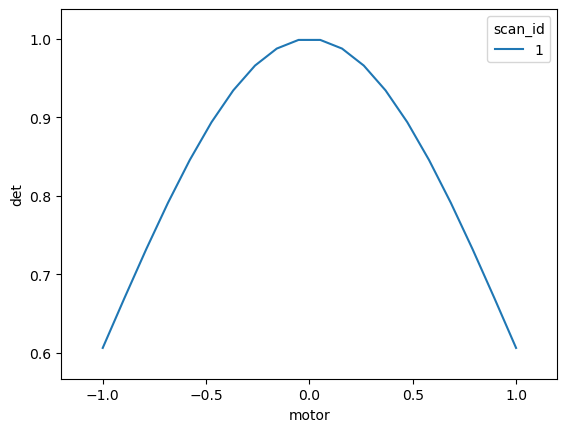

In [4]:
RE(
    scan([det], motor, -1, 1, num=20), [JupyterLivePlot(det.name, motor.name)]
)

('3d575351-162b-457b-9c97-87a3afa30cba',)

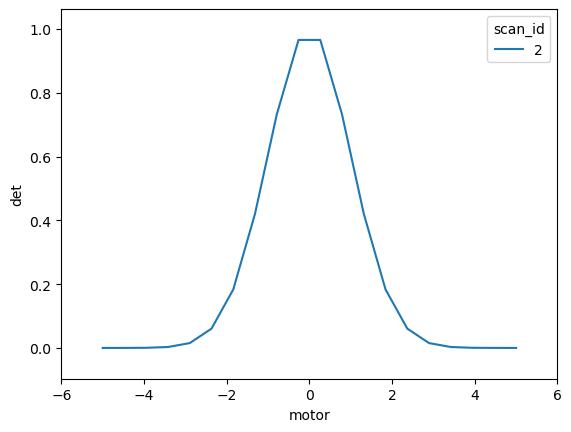

In [5]:
RE(
    scan([det], motor, -5, 5, num=20), [JupyterLivePlot(det.name, motor.name)]
)

('20bb1439-c29a-4d60-8c25-09e8e76ed446',)

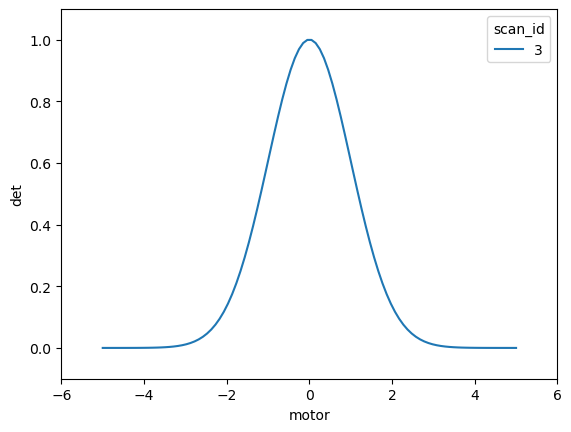

In [6]:
RE(
    scan([det], motor, -5, 5, num=100), [JupyterLivePlot(det.name, motor.name)]
)

## Plot fitting

('3a1e4f3a-5da8-4bdb-ac66-663b40b526dc',)

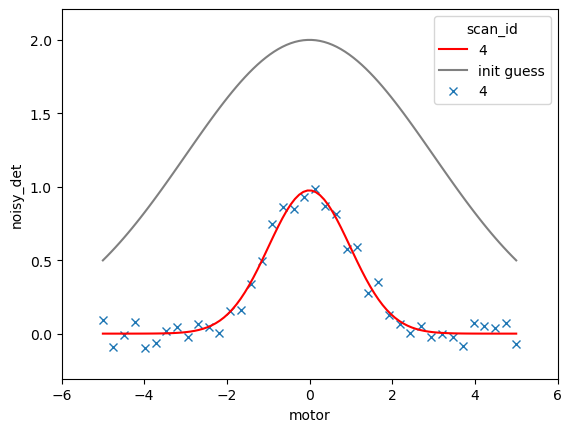

In [8]:
fig, ax = plt.subplots()
def gaussian(x, peak, sigma, x0):
    return peak*np.exp(-(x - x0)**2/(2 * sigma**2))

model = lmfit.Model(gaussian)
init_guess = { 'peak': 2, 'sigma': lmfit.Parameter('sigma', 3, min=0), 'x0': 0}
live_fit = LiveFit(model, 'noisy_det', {'x': 'motor'}, init_guess)
live_fit_plot = JupyterLiveFitPlot(live_fit, fig=fig, ax=ax, color='r')
live_plot = JupyterLivePlot('noisy_det', 'motor', marker='x', fig=fig, ax=ax, linestyle='none')
RE(
    scan([noisy_det], motor, -5, 5, num=40),
    [live_fit_plot, live_plot]
)

### Peak Stats

* cen: center of mass
* com: mid-point between half-max points on each side of the peak
* max: location of y maximum
* min: location of y minimum

In [ ]:
ps = PeakStats('motor', 'noisy_det', calc_derivative_and_stats=True)
RE(
    scan([noisy_det], motor, -1, 4.5, num=30), [ps, JupyterLivePlot(noisy_det.name, motor.name)]
)

plot_peak_stats(ps)

## Relative Scan

In [ ]:
help(rel_scan)

In [ ]:
RE(mv(motor, 3))
RE(
    rel_scan([det], motor, -1, 2, num=50), [JupyterLivePlot(det.name, motor.name)]
)

In [ ]:
RE(
    rel_scan([det], motor, -1, 2, num=50), [JupyterLivePlot(det.name, motor.name)]
)

## List Scan

In [ ]:
help(list_scan)

In [ ]:
RE(
    list_scan([det], motor, [-1.4, -1.3, -0.8, -0.7, -0.2, -0.1]), [JupyterLivePlot(det.name, motor.name)]
)

## Relative List Scan

In [ ]:
help(rel_list_scan)

In [ ]:
RE(mv(motor, 3))
RE(
    rel_list_scan([det], motor, [-1.4, -1.3, -0.8, -0.7, -0.2, -0.1]), [JupyterLivePlot(det.name, motor.name)]
)

## Log Scan

In [ ]:
help(log_scan)

In [ ]:
RE(
    log_scan([det], motor, -1, 1, num=25), [JupyterLivePlot(det.name, motor.name)]
)

In [ ]:
RE(
    log_scan([motor], motor, -1, 1, num=25), [JupyterLivePlot(motor.name, motor.name)]
)

### Exercícios

1. Descubra o valor máximo do detector 'det3' e a posição do 'motor3' nesse ponto.
2. Mova o motor 'motor1' e obtenha o valor máximo e mínimo do detector 'det1' utilizando o gráfico PeakStats.
3. Adquira os valores do 'det3' com o motor 'motor3' nos pontos (-8.3, -4.5, -0.45, 0.65, 2.4, 6.2 e 9.8). 
4. Adquira 45 medidas com o detector 'det3' em um intervalo de -1 mm até +1 mm a partir da posição atual do 'motor3'. 

> Dica: Mova o 'motor3' dentro do limite mínimo -10 e limite máximo 10.